In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [2]:
# Load CSV file
df = pd.read_csv('train.csv')
# Load and preprocess the test set
df_test = pd.read_csv('test.csv')

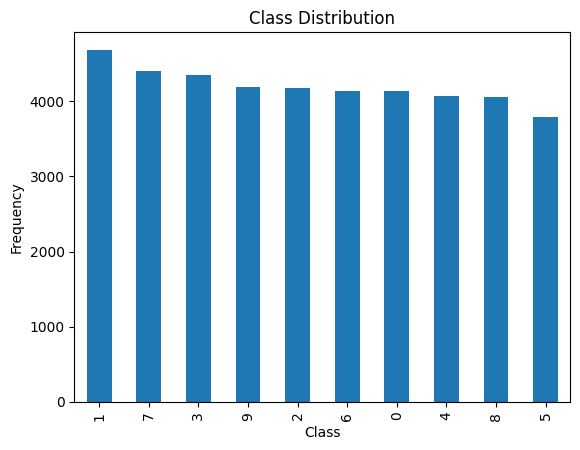

In [3]:
#check for even class distribution
df['label'].value_counts().plot(kind='bar')
plt.title('Class Distribution')
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.show()

In [4]:
# separate into input and output columns
X = df.drop('label', axis=1).values
y = df['label'].values

# separate into input and output columns
X_final = df_test.values

# Model Options

In [5]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten
from sklearn import svm

## Convoluted NN

In [6]:
#98.389 score

# reshape inputs to be [samples][width][height][channels]
X = X.reshape((X.shape[0], 28, 28, 1))
X_final = X_final.reshape((X_final.shape[0], 28, 28, 1))
# normalize pixel values
X = X.astype('float32') / 255.0
X_final = X_final.astype('float32') / 255.0

# one hot encode target values
y = to_categorical(y)

# split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(100, activation='relu'))
model.add(Dense(10, activation='softmax'))

# compile model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# train the model
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/10
1050/1050 [==============================] - 23s 19ms/step - loss: 0.2126 - accuracy: 0.9376 - val_loss: 0.0908 - val_accuracy: 0.9712
Epoch 2/10
1050/1050 [==============================] - 19s 18ms/step - loss: 0.0694 - accuracy: 0.9789 - val_loss: 0.0651 - val_accuracy: 0.9801
Epoch 3/10
1050/1050 [==============================] - 19s 18ms/step - loss: 0.0444 - accuracy: 0.9855 - val_loss: 0.0589 - val_accuracy: 0.9812
Epoch 4/10
1050/1050 [==============================] - 19s 18ms/step - loss: 0.0306 - accuracy: 0.9903 - val_loss: 0.0630 - val_accuracy: 0.9818
Epoch 5/10
1050/1050 [==============================] - 19s 18ms/step - loss: 0.0208 - accuracy: 0.9932 - val_loss: 0.0609 - val_accuracy: 0.9849
Epoch 6/10
1050/1050 [==============================] - 19s 18ms/step - loss: 0.0156 - accuracy: 0.9946 - val_loss: 0.0745 - val_accuracy: 0.9830
Epoch 7/10
1050/1050 [==============================] - 18s 17ms/step - loss: 0.0115 - accuracy: 0.9963 - val_loss: 0.0811 -

In [7]:
# Predict labels for the test set
pred = model.predict(X_final)
pred = np.argmax(pred, axis=1)  # Convert one-hot encoded predictions to labels

# Create a DataFrame with ImageIDs and predicted labels
df_pred = pd.DataFrame({
    'ImageID': df_test.index + 1,  # Assuming ImageIDs should start from 1
    'Label': pred
})

# Save the result DataFrame to a new CSV file
df_pred.to_csv('cnnpredicted_labels.csv', index=False) 

875/875 [==============================] - 5s 6ms/step


## Deep Neural Network

In [25]:
# split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

#model with
model = Sequential()
model.add(Flatten(input_shape=(28, 28, 1)))
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='softmax'))

# compile model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# train the model
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/10
1050/1050 [==============================] - 3s 2ms/step - loss: 0.2939 - accuracy: 0.9124 - val_loss: 0.1578 - val_accuracy: 0.9529
Epoch 2/10
1050/1050 [==============================] - 2s 2ms/step - loss: 0.1275 - accuracy: 0.9622 - val_loss: 0.1193 - val_accuracy: 0.9635
Epoch 3/10
1050/1050 [==============================] - 2s 2ms/step - loss: 0.0851 - accuracy: 0.9736 - val_loss: 0.1094 - val_accuracy: 0.9655
Epoch 4/10
1050/1050 [==============================] - 2s 2ms/step - loss: 0.0635 - accuracy: 0.9800 - val_loss: 0.0930 - val_accuracy: 0.9730
Epoch 5/10
1050/1050 [==============================] - 2s 2ms/step - loss: 0.0487 - accuracy: 0.9843 - val_loss: 0.1266 - val_accuracy: 0.9660
Epoch 6/10
1050/1050 [==============================] - 2s 2ms/step - loss: 0.0352 - accuracy: 0.9880 - val_loss: 0.1382 - val_accuracy: 0.9631
Epoch 7/10
1050/1050 [==============================] - 2s 2ms/step - loss: 0.0312 - accuracy: 0.9896 - val_loss: 0.1020 - val_accuracy:

In [26]:
# Predict labels for the test set
pred = model.predict(X_final)
pred = np.argmax(pred, axis=1)  # Convert one-hot encoded predictions to labels

# Create a DataFrame with ImageIDs and predicted labels
df_pred = pd.DataFrame({
    'ImageID': df_test.index + 1,  # Assuming ImageIDs should start from 1
    'Label': pred
})

# Save the result DataFrame to a new CSV file
df_pred.to_csv('dnnpredicted_labels.csv', index=False)

875/875 [==============================] - 1s 997us/step


## SVM

In [39]:
scaler = StandardScaler()
X = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

model = svm.SVC(gamma=0.001)
model.fit(X_train, y_train)

SVC(gamma=0.001)

In [40]:
# Predict labels for the test set
y_final = model.predict(X_final)

# Create a DataFrame with ImageIDs and predicted labels
df_pred = pd.DataFrame({
    'ImageID': df_test.index + 1,  # Assuming ImageIDs should start from 1
    'Label': y_final
})

# Save the result DataFrame to a new CSV file
df_pred.to_csv('predicted_labels_svm.csv', index=False)